In [1]:
!pip install -q pandas numpy scikit-learn matplotlib tensorflow

In [ ]:
import matplotlib.font_manager as fm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, Input, Dropout, Conv1DTranspose
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = " " # 코랩 환경 + 구글 클라우드에서 개발, 데이터셋 경로 위치 맞춤형으로 설정 

vib_normal = pd.read_csv(base_path + "vibration_normal.csv")
vib_anomaly = pd.read_csv(base_path + "vibration_anomaly.csv")
cur_normal = pd.read_csv(base_path + "current_normal.csv")
cur_anomaly = pd.read_csv(base_path + "current_anomaly.csv")

# 시각화 & 데이터 기본 탐색

#### 진동 정상 데이터와 이상 데이터 확인

In [30]:
vib_normal.head()

,Time,0,3.12,6.25,9.38,12.5,15.62,18.75,21.88,25,...,1568.75,1571.88,1575,1578.12,1581.25,1584.38,1587.5,1590.62,1593.75,1596.88
0,2021-08-02 6:47,0.000448,0.000634,0.000895,0.001124,0.000333,0.000583,0.000242,0.000743,0.001193,...,0.000317,0.000457,0.000994,0.000815,0.000344,0.000280,0.000636,0.000639,0.000780,0.000728
1,2021-08-02 7:12,0.000001,0.000176,0.000315,0.000793,0.001073,0.001130,0.001330,0.000867,0.000609,...,0.000352,0.000346,0.000111,0.000173,0.000533,0.000419,0.000422,0.000654,0.000172,0.000238
2,2021-08-02 7:36,0.000594,0.000379,0.001343,0.000454,0.000517,0.000454,0.000693,0.001282,0.001232,...,0.000143,0.000389,0.000983,0.000983,0.000157,0.000881,0.001318,0.000757,0.000638,0.000872
3,2021-08-02 7:59,0.000168,0.000438,0.000732,0.000812,0.000957,0.000835,0.001051,0.000489,0.000181,...,0.000894,0.000802,0.000983,0.000872,0.000740,0.000222,0.000566,0.000917,0.000849,0.000489
4,2021-08-02 8:27,0.000370,0.000512,0.000656,0.000267,0.000236,0.000236,0.000305,0.000629,0.001426,...,0.000731,0.000453,0.000630,0.000712,0.000496,0.000706,0.000513,0.000119,0.000599,0.000746


In [31]:
vib_anomaly.head()

,Time,0,3.12,6.25,9.38,12.5,15.62,18.75,21.88,25,...,1568.75,1571.88,1575,1578.12,1581.25,1584.38,1587.5,1590.62,1593.75,1596.88
0,2022-01-17 16:53,0.017119,0.031108,0.018228,0.045243,0.032953,0.011007,0.020632,0.022722,0.021065,...,0.003080,0.047822,0.073223,0.029722,0.016643,0.005442,0.044247,0.033641,0.034237,0.047196
1,2022-01-26 14:50,0.008463,0.020489,0.040288,0.011786,0.006749,0.027902,0.036479,0.016292,0.009036,...,0.014840,0.025090,0.025218,0.018054,0.023980,0.018671,0.013548,0.043027,0.054982,0.034446
2,2022-02-10 18:16,0.013359,0.049131,0.076610,0.061570,0.055249,0.043330,0.030105,0.028493,0.044670,...,0.052756,0.061957,0.036153,0.027028,0.055728,0.057243,0.039780,0.034525,0.041085,0.023809
3,2022-02-22 9:21,0.016137,0.034178,0.022711,0.036808,0.054250,0.031692,0.011437,0.006979,0.010247,...,0.009296,0.003761,0.002089,0.007499,0.007337,0.004411,0.001132,0.004809,0.004792,0.006091
4,2022-02-23 19:40,0.002293,0.031036,0.061567,0.057566,0.040840,0.025495,0.012431,0.010275,0.011133,...,0.023630,0.017060,0.008875,0.005707,0.006139,0.007393,0.002851,0.006780,0.009328,0.006557


#### 전류 정상 데이터와 이상 데이터

In [32]:
cur_normal.head()

,Time,0,1.91,3.81,5.72,7.63,9.54,11.44,13.35,15.26,...,1933.93,1935.83,1937.74,1939.65,1941.56,1943.46,1945.37,1947.28,1949.19,1951.09
0,2021-09-01 0:04,0.028044,0.033194,0.023135,0.019984,0.012384,0.015154,0.003928,0.002710,0.001608,...,0.000641,0.000434,0.000695,0.000511,0.000566,0.000929,0.000841,0.000147,0.000633,0.000309
1,2021-09-01 0:07,0.017024,0.061488,0.025492,0.019490,0.003985,0.000198,0.001219,0.000958,0.000525,...,0.000394,0.000437,0.000833,0.001000,0.001070,0.000533,0.000425,0.000545,0.000734,0.000580
2,2021-09-01 0:10,0.055605,0.051026,0.033430,0.015864,0.010201,0.004803,0.001797,0.002638,0.002295,...,0.000610,0.000373,0.000331,0.000151,0.000219,0.000310,0.000346,0.000757,0.000883,0.000536
3,2021-09-01 0:17,0.070640,0.090214,0.061381,0.023377,0.018212,0.004499,0.001965,0.002304,0.002807,...,0.000676,0.000503,0.000430,0.000347,0.000463,0.000607,0.000992,0.000579,0.000623,0.000383
4,2021-09-01 0:21,0.089390,0.101223,0.069492,0.029898,0.013571,0.007979,0.002882,0.003186,0.000395,...,0.000552,0.000507,0.000512,0.000557,0.000603,0.000919,0.000860,0.000146,0.000602,0.000272


In [33]:
cur_anomaly.head()

,Time,0,1.91,3.81,5.72,7.63,9.54,11.44,13.35,15.26,...,1933.93,1935.83,1937.74,1939.65,1941.56,1943.46,1945.37,1947.28,1949.19,1951.09
0,2021-07-21 15:40,3.767835,4.020009,0.875950,6.156515,5.546138,3.100119,8.766246,1.633168,5.111375,...,0.088311,0.132539,0.089407,0.099254,0.234076,0.155161,0.215416,0.254271,0.246627,0.147443
1,2021-07-21 16:33,5.106608,12.013001,9.308904,5.215157,10.490317,2.403275,14.367259,14.665602,4.620723,...,0.304766,0.085849,0.090350,0.131499,0.067617,0.171688,0.103295,0.112468,0.171594,0.108564
2,2021-07-21 19:58,5.747002,12.725037,10.936867,5.417918,6.302464,6.878624,6.669328,6.745722,6.463291,...,0.407950,0.380353,0.376850,0.331752,0.184041,0.163163,0.248755,0.190100,0.068477,0.089433
3,2021-07-22 13:19,6.930827,9.550858,12.423865,5.608191,4.370304,2.212492,2.340739,2.469330,6.216851,...,0.085864,0.120988,0.185122,0.075912,0.097762,0.065786,0.023454,0.141953,0.200623,0.054378
4,2021-07-22 13:25,2.577766,8.017437,5.942433,8.286139,6.780290,5.479986,5.983894,6.516971,5.466931,...,0.197637,0.298523,0.180578,0.121295,0.091325,0.079708,0.164527,0.270300,0.144208,0.174007


### 데이터 시각화

In [34]:
plt.rc('font',size=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

#### 진동 데이터 시각화

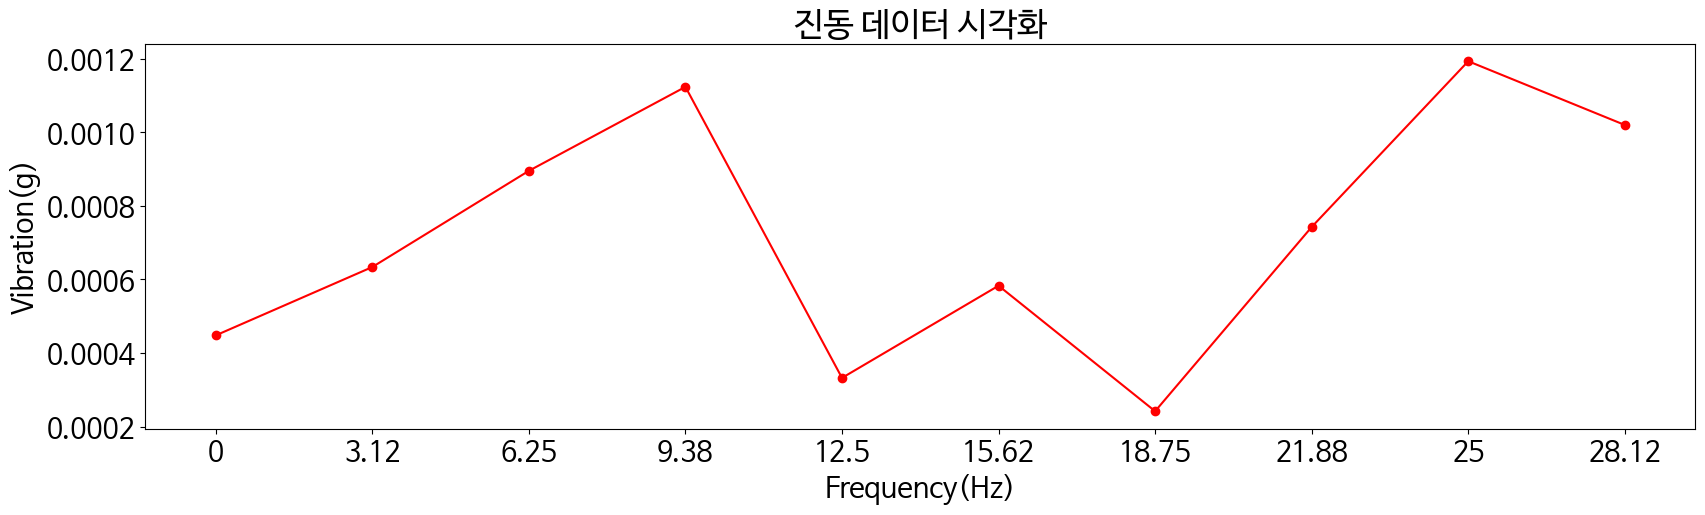

In [53]:
plt.figure(figsize=(20,5))
plt.title('진동 데이터 시각화')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Vibration(g)')
plt.plot(vib_normal.iloc[0, 1:11], marker='o', color='red')
plt.show()

#### 전류 데이터 시각화

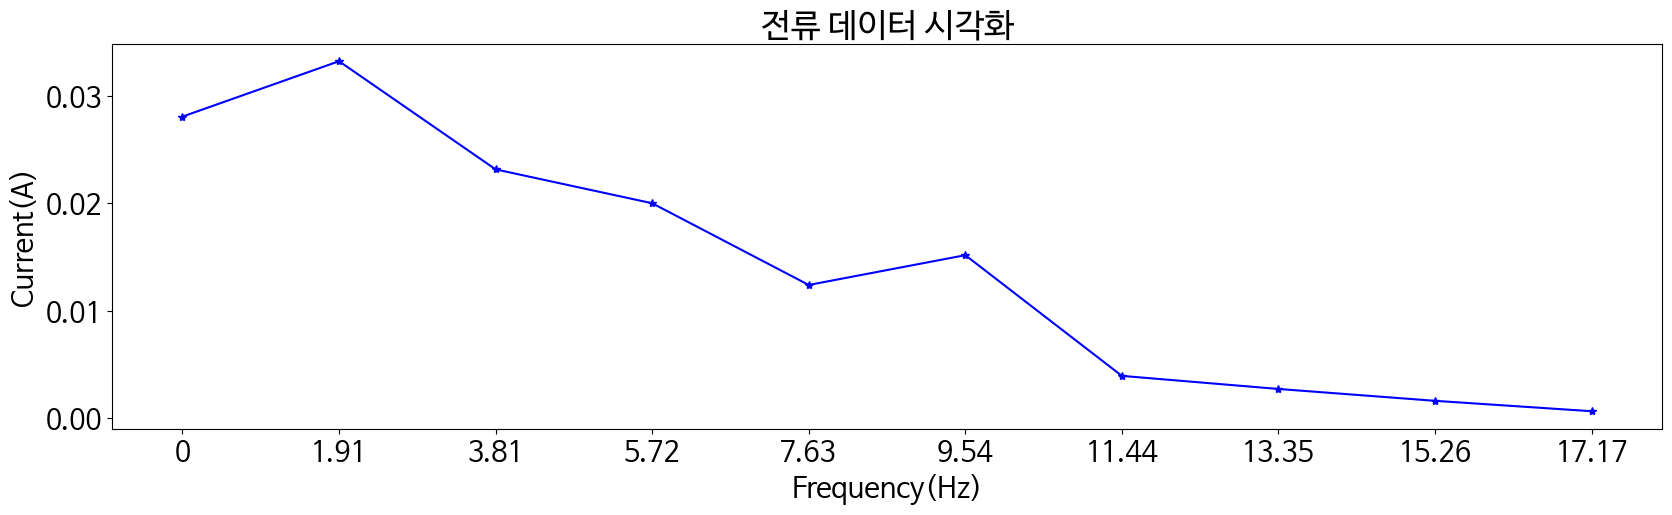

In [36]:
plt.figure(figsize=(20,5))
plt.title('전류 데이터 시각화')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Current(A)')
plt.plot(cur_normal.iloc[0,1:11], marker='*', color='blue')
plt.show()

#### 정상 데이터와 이상 데이터 비교 시각화

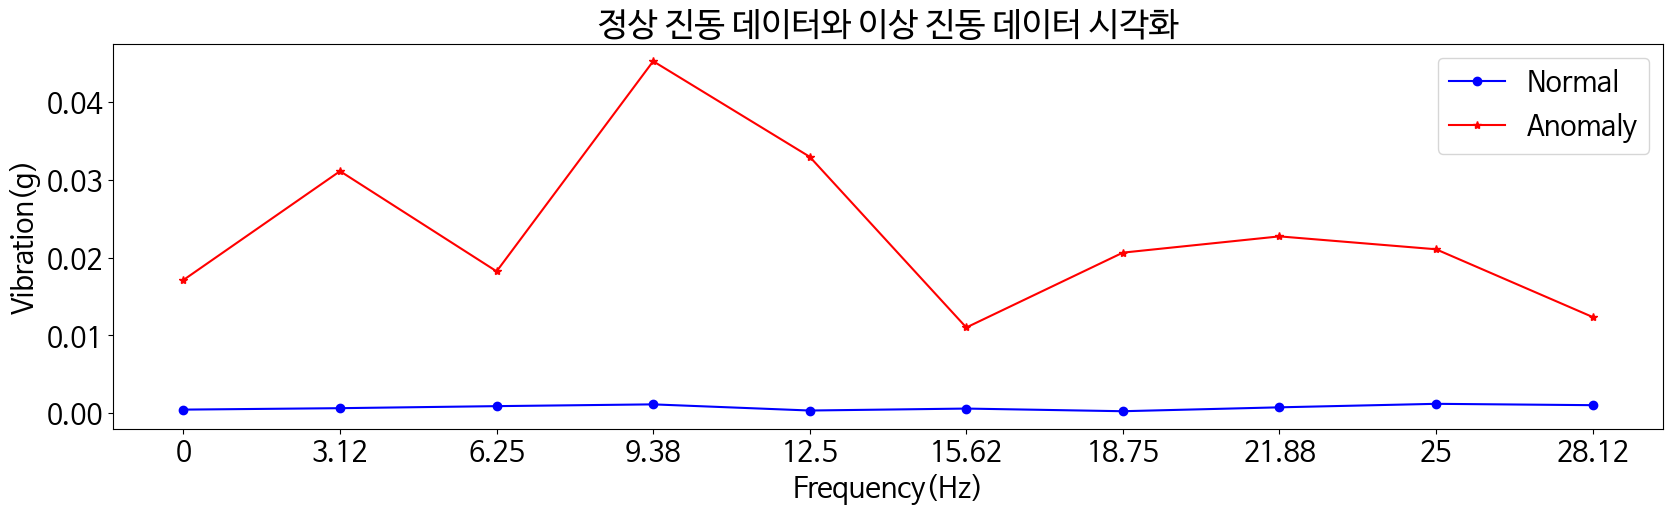

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('정상 진동 데이터와 이상 진동 데이터 시각화')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Vibration(g)')
plt.plot(vib_normal.iloc[0,	1:11],	marker='o',	color='blue', label='Normal')
plt.plot(vib_anomaly.iloc[0, 1:11],	marker='*',	color='red', label='Anomaly')
plt.legend()
plt.show()

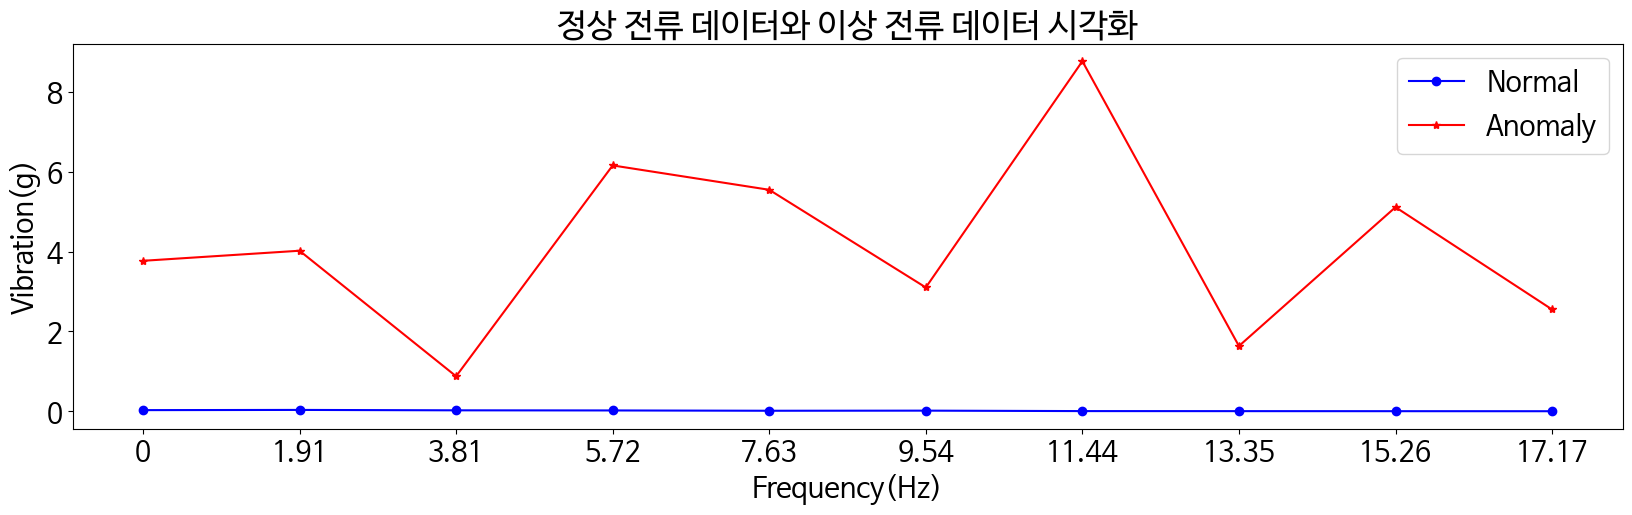

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('정상 전류 데이터와 이상 전류 데이터 시각화')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Vibration(g)')
plt.plot(cur_normal.iloc[0,	1:11], marker='o', color='blue', label='Normal')
plt.plot(cur_anomaly.iloc[0, 1:11], marker='*', color='red', label='Anomaly')
plt.legend()
plt.show()

### 데이터 탐색

#### 데이터 확인

In [39]:
vib_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Columns: 513 entries, Time to 1596.88
dtypes: float64(512), object(1)
memory usage: 6.9+ MB


In [40]:
vib_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 513 entries, Time to 1596.88
dtypes: float64(512), object(1)
memory usage: 64.3+ KB


In [41]:
cur_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Columns: 1025 entries, Time to 1951.09
dtypes: float64(1024), object(1)
memory usage: 64.1+ MB


In [42]:
cur_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 1025 entries, Time to 1951.09
dtypes: float64(1024), object(1)
memory usage: 256.4+ KB


#### 데이터 통계량 확인

In [43]:
vib_normal.describe()

,0,3.12,6.25,9.38,12.5,15.62,18.75,21.88,25,28.12,...,1568.75,1571.88,1575,1578.12,1581.25,1584.38,1587.5,1590.62,1593.75,1596.88
count,1.774000e+03,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,...,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,3.957833e-04,0.000739,0.000791,0.000755,0.000792,0.000819,0.000837,0.000875,0.000904,0.000923,...,0.000628,0.000628,0.000624,0.000621,0.000616,0.000602,0.000618,0.000628,0.000601,0.000422
std,4.696484e-04,0.000996,0.001285,0.000831,0.000618,0.000662,0.000699,0.000832,0.000838,0.000884,...,0.000386,0.000380,0.000381,0.000366,0.000367,0.000371,0.000395,0.000399,0.000390,0.000282
min,1.940000e-07,0.000026,0.000012,0.000013,0.000004,0.000035,0.000017,0.000019,0.000029,0.000013,...,0.000007,0.000013,0.000006,0.000011,0.000031,0.000002,0.000016,0.000023,0.000020,0.000008
25%,1.303137e-04,0.000370,0.000417,0.000396,0.000441,0.000466,0.000456,0.000480,0.000500,0.000503,...,0.000363,0.000358,0.000352,0.000364,0.000350,0.000342,0.000336,0.000356,0.000341,0.000229
50%,3.012655e-04,0.000592,0.000647,0.000636,0.000686,0.000705,0.000732,0.000766,0.000785,0.000789,...,0.000554,0.000558,0.000548,0.000551,0.000558,0.000531,0.000537,0.000556,0.000533,0.000367
75%,5.175687e-04,0.000914,0.000944,0.000919,0.000988,0.001021,0.001073,0.001112,0.001131,0.001164,...,0.000823,0.000814,0.000810,0.000800,0.000801,0.000772,0.000809,0.000802,0.000776,0.000550
max,1.014758e-02,0.034840,0.041001,0.022906,0.012550,0.010571,0.014022,0.017517,0.018805,0.017654,...,0.003332,0.002509,0.003065,0.002895,0.002429,0.002882,0.003529,0.003379,0.004185,0.003108


In [44]:
vib_anomaly.describe()

,0,3.12,6.25,9.38,12.5,15.62,18.75,21.88,25,28.12,...,1568.75,1571.88,1575,1578.12,1581.25,1584.38,1587.5,1590.62,1593.75,1596.88
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.013786,0.029425,0.031593,0.024693,0.023838,0.021556,0.022704,0.015820,0.013257,0.012501,...,0.023955,0.023620,0.020946,0.016045,0.021779,0.020399,0.017980,0.017234,0.019069,0.014062
std,0.015679,0.018364,0.019084,0.017172,0.017896,0.011829,0.013280,0.007814,0.010639,0.008008,...,0.017704,0.019947,0.019696,0.012145,0.021760,0.016615,0.015658,0.013074,0.015670,0.013213
min,0.000129,0.004947,0.006308,0.007834,0.003561,0.005212,0.007362,0.004388,0.001583,0.004308,...,0.003080,0.003761,0.002089,0.000641,0.001255,0.004353,0.001132,0.003172,0.001718,0.001196
25%,0.002406,0.020330,0.020912,0.011799,0.007745,0.013450,0.011365,0.009997,0.006823,0.007331,...,0.013454,0.007610,0.008412,0.006145,0.006557,0.006781,0.006503,0.007454,0.005576,0.004136
50%,0.009300,0.023152,0.025838,0.019777,0.018592,0.020922,0.019479,0.014260,0.010458,0.010748,...,0.018730,0.017856,0.013623,0.014272,0.012990,0.015888,0.010892,0.010731,0.012972,0.009364
75%,0.016383,0.034432,0.040664,0.033167,0.040558,0.028617,0.031699,0.022836,0.017115,0.013785,...,0.028388,0.030369,0.024991,0.025917,0.029100,0.030651,0.028372,0.024154,0.028106,0.019327
max,0.049609,0.072430,0.076610,0.061570,0.055249,0.043330,0.049333,0.029236,0.044670,0.035102,...,0.061035,0.068041,0.073223,0.042987,0.064231,0.057243,0.044247,0.043027,0.054982,0.047196


In [45]:
cur_normal.describe()

,0,1.91,3.81,5.72,7.63,9.54,11.44,13.35,15.26,17.17,...,1933.93,1935.83,1937.74,1939.65,1941.56,1943.46,1945.37,1947.28,1949.19,1951.09
count,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,...,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000
mean,0.145262,0.213468,0.161549,0.124159,0.115730,0.116065,0.115951,0.117674,0.117489,0.116744,...,0.005877,0.005862,0.005924,0.005905,0.005781,0.005795,0.005876,0.005956,0.005847,0.004200
std,0.303807,0.415226,0.296994,0.252865,0.278344,0.303998,0.304563,0.285393,0.263282,0.262186,...,0.013465,0.012687,0.012913,0.012953,0.011916,0.012452,0.014725,0.014739,0.012618,0.010394
min,0.000007,0.009473,0.004993,0.001826,0.000173,0.000005,0.000028,0.000048,0.000021,0.000017,...,0.000009,0.000003,0.000005,0.000006,0.000006,0.000007,0.000005,0.000008,0.000004,0.000009
25%,0.031958,0.064549,0.036768,0.019969,0.007993,0.003919,0.002335,0.001717,0.001394,0.001231,...,0.000391,0.000397,0.000393,0.000397,0.000387,0.000397,0.000396,0.000395,0.000398,0.000277
50%,0.066033,0.092602,0.060868,0.026907,0.013033,0.006834,0.004430,0.003601,0.002908,0.002550,...,0.000665,0.000661,0.000671,0.000677,0.000663,0.000670,0.000668,0.000670,0.000673,0.000476
75%,0.094002,0.132375,0.098634,0.056456,0.045485,0.047036,0.047313,0.048497,0.049206,0.049728,...,0.002446,0.002503,0.002410,0.002426,0.002477,0.002456,0.002552,0.002462,0.002382,0.001749
max,5.158219,8.008170,6.148667,9.150436,12.385920,15.730239,14.628004,9.197418,3.214151,3.215591,...,0.507332,0.507902,0.559833,0.443131,0.409797,0.500882,0.663663,0.652065,0.476364,0.472923


In [46]:
cur_anomaly.describe()

,0,1.91,3.81,5.72,7.63,9.54,11.44,13.35,15.26,17.17,...,1933.93,1935.83,1937.74,1939.65,1941.56,1943.46,1945.37,1947.28,1949.19,1951.09
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,3.777701,7.179674,7.594178,7.276154,6.255351,6.156840,7.009353,7.002101,6.429256,6.373446,...,0.182378,0.164101,0.156210,0.160724,0.138629,0.147711,0.163943,0.192863,0.184381,0.119195
std,2.561017,3.032198,3.764690,3.557543,3.853381,3.804884,3.930025,5.077647,4.341047,4.355782,...,0.126532,0.130058,0.110902,0.105637,0.099868,0.104533,0.110630,0.120250,0.121867,0.082938
min,0.054753,2.420853,0.875950,0.853875,0.214854,0.049241,0.156315,0.141678,0.334482,0.182462,...,0.007794,0.014954,0.025577,0.007595,0.033508,0.022752,0.023454,0.010514,0.007080,0.009402
25%,1.726957,4.700260,4.831052,5.367228,3.717430,2.430446,4.803825,2.824942,3.742411,2.503777,...,0.087699,0.096109,0.079847,0.085318,0.061085,0.077134,0.092392,0.094088,0.103787,0.063030
50%,3.580204,6.734784,7.165330,6.461502,5.933349,6.494894,6.339576,6.631347,5.578215,5.616404,...,0.153508,0.123906,0.126557,0.138150,0.101214,0.123770,0.124997,0.168966,0.175191,0.100457
75%,6.128305,9.619605,10.067216,9.828834,8.421232,9.258497,8.572312,9.701747,8.510678,9.432567,...,0.246439,0.194113,0.188537,0.224127,0.194281,0.173314,0.220347,0.273967,0.232471,0.151507
max,9.514542,12.725037,15.296677,14.821374,15.371070,12.961935,17.136589,19.887154,17.712770,15.564486,...,0.495735,0.587120,0.473852,0.470796,0.447906,0.434716,0.471168,0.496649,0.540776,0.403965


#### 사분위수


In [ ]:
vib_normal.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
0,0.000396,0.000470,1.940000e-07,0.000130,0.000301,0.000518,0.010148
3.12,0.000739,0.000996,2.580000e-05,0.000370,0.000592,0.000914,0.034840
6.25,0.000791,0.001285,1.240000e-05,0.000417,0.000647,0.000944,0.041001
9.38,0.000755,0.000831,1.290000e-05,0.000396,0.000636,0.000919,0.022906
12.5,0.000792,0.000618,3.660000e-06,0.000441,0.000686,0.000988,0.012550
...,...,...,...,...,...,...,...
1584.38,0.000602,0.000371,1.810000e-06,0.000342,0.000531,0.000772,0.002882
1587.5,0.000618,0.000395,1.620000e-05,0.000336,0.000537,0.000809,0.003529
1590.62,0.000628,0.000399,2.250000e-05,0.000356,0.000556,0.000802,0.003379
1593.75,0.000601,0.000390,1.980000e-05,0.000341,0.000533,0.000776,0.004185


In [48]:
print("📌 [vib_normal] Box Analysis")

# 숫자형 데이터만 선택
vib_numeric = vib_normal.select_dtypes(include=['number'])

# 사분위수 계산
q1_vib = vib_numeric.quantile(0.25)
q2_vib = vib_numeric.quantile(0.50)
q3_vib = vib_numeric.quantile(0.75)
iqr_vib = q3_vib - q1_vib

# 이상치 기준
lower_bound_vib = q1_vib - 1.5 * iqr_vib
upper_bound_vib = q3_vib + 1.5 * iqr_vib

# 출력
print(f"Q1:\n{q1_vib}\n")
print(f"Q2 (Median):\n{q2_vib}\n")
print(f"Q3:\n{q3_vib}\n")
print(f"IQR:\n{iqr_vib}\n")
print(f"Lower Bound:\n{lower_bound_vib}\n")
print(f"Upper Bound:\n{upper_bound_vib}\n")

📌 [vib_normal] Box Analysis
Q1:
0          0.000130
3.12       0.000370
6.25       0.000417
9.38       0.000396
12.5       0.000441
             ...   
1584.38    0.000342
1587.5     0.000336
1590.62    0.000356
1593.75    0.000341
1596.88    0.000229
Name: 0.25, Length: 512, dtype: float64

Q2 (Median):
0          0.000301
3.12       0.000592
6.25       0.000647
9.38       0.000636
12.5       0.000686
             ...   
1584.38    0.000531
1587.5     0.000537
1590.62    0.000556
1593.75    0.000533
1596.88    0.000367
Name: 0.5, Length: 512, dtype: float64

Q3:
0          0.000518
3.12       0.000914
6.25       0.000944
9.38       0.000919
12.5       0.000988
             ...   
1584.38    0.000772
1587.5     0.000809
1590.62    0.000802
1593.75    0.000776
1596.88    0.000550
Name: 0.75, Length: 512, dtype: float64

IQR:
0          0.000387
3.12       0.000544
6.25       0.000527
9.38       0.000523
12.5       0.000547
             ...   
1584.38    0.000430
1587.5     0.000473
1590

In [50]:
cur_normal.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
0,0.145262,0.303807,0.000007,0.031958,0.066033,0.094002,5.158219
1.91,0.213468,0.415226,0.009473,0.064549,0.092602,0.132375,8.008170
3.81,0.161549,0.296994,0.004993,0.036768,0.060868,0.098634,6.148667
5.72,0.124159,0.252865,0.001826,0.019969,0.026907,0.056456,9.150436
7.63,0.115730,0.278344,0.000173,0.007993,0.013033,0.045485,12.385920
...,...,...,...,...,...,...,...
1943.46,0.005795,0.012452,0.000007,0.000397,0.000670,0.002456,0.500882
1945.37,0.005876,0.014725,0.000005,0.000396,0.000668,0.002552,0.663663
1947.28,0.005956,0.014739,0.000008,0.000395,0.000670,0.002462,0.652065
1949.19,0.005847,0.012618,0.000004,0.000398,0.000673,0.002382,0.476364


In [51]:
print("📌 [cur_normal] Box Analysis")

# 숫자형 데이터만 선택
cur_numeric = cur_normal.select_dtypes(include=['number'])

# 사분위수 계산
q1_cur = cur_numeric.quantile(0.25)
q2_cur = cur_numeric.quantile(0.50)
q3_cur = cur_numeric.quantile(0.75)
iqr_cur = q3_cur - q1_cur

# 이상치 기준
lower_bound_cur = q1_cur - 1.5 * iqr_cur
upper_bound_cur = q3_cur + 1.5 * iqr_cur

# 출력
print(f"Q1:\n{q1_cur}\n")
print(f"Q2 (Median):\n{q2_cur}\n")
print(f"Q3:\n{q3_cur}\n")
print(f"IQR:\n{iqr_cur}\n")
print(f"Lower Bound:\n{lower_bound_cur}\n")
print(f"Upper Bound:\n{upper_bound_cur}\n")

📌 [cur_normal] Box Analysis
Q1:
0          0.031958
1.91       0.064549
3.81       0.036768
5.72       0.019969
7.63       0.007993
             ...   
1943.46    0.000397
1945.37    0.000396
1947.28    0.000395
1949.19    0.000398
1951.09    0.000277
Name: 0.25, Length: 1024, dtype: float64

Q2 (Median):
0          0.066033
1.91       0.092602
3.81       0.060868
5.72       0.026907
7.63       0.013033
             ...   
1943.46    0.000670
1945.37    0.000668
1947.28    0.000670
1949.19    0.000673
1951.09    0.000476
Name: 0.5, Length: 1024, dtype: float64

Q3:
0          0.094002
1.91       0.132375
3.81       0.098634
5.72       0.056456
7.63       0.045485
             ...   
1943.46    0.002456
1945.37    0.002552
1947.28    0.002462
1949.19    0.002382
1951.09    0.001749
Name: 0.75, Length: 1024, dtype: float64

IQR:
0          0.062044
1.91       0.067827
3.81       0.061866
5.72       0.036487
7.63       0.037492
             ...   
1943.46    0.002059
1945.37    0.002156
1